<!--NOTEBOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="./figures/LogoOpenclassrooms.png">
<font size="4">
    
Cette étude a été réalisée dans le cadre du 6ème projet de ma formation Datascientist dispensée en MOOC par 

<font color='blus'>Openclassrooms / écoles Centrale-Supélec</font>.




<p></p><p></p><p></p>





**Le problème posé :**

# <font color='blus'>Indexation d'images</font>

Vous êtes bénévole pour l'association de protection des animaux de votre quartier. C'est d'ailleurs ainsi que vous avez trouvé votre compagnon idéal, Snooky. Du coup, vous vous demandez ce que vous pouvez faire en retour pour aider l'association.

Vous apprenez, en discutant avec un bénévole, que leur base de données de pensionnaires commence à s'agrandir et qu'ils n'ont pas toujours le temps de référencer les images des animaux qu'ils ont accumulées depuis plusieurs années. Ils aimeraient donc réaliser un index de l’ensemble de la base de données d’images qu’ils possèdent, pour classer les chiens par races.

**<font color='blus'>Les données</font>**

Les bénévoles de l'association n'ont pas eu le temps de réunir les différentes images des pensionnaires dispersées sur leurs disques durs. Pas de problème, vous développerez un algorithme en utilisant le Stanford Dogs Dataset pour entraîner votre algorithme.

**<font color='blus'>Votre mission</font>**

En tant que Data Scientist, l'association vous demande de réaliser un algorithme de détection de la race du chien sur une photo, afin d'accélérer leur travail d’indexation.

**<font color='blus'>Contraintes</font>**

Lors de ce projet, vous mettrez en œuvre deux approches.

* Une approche classique : il s’agit de pre-processer des images avec des techniques spécifiques (e.g.whitening, equalisation, filtre linéaire/laplacien/gaussien, éventuellement modifier la taille des images), puis d’extraire des features (e.g. texture, corners, edges et SIFT detector). Il faut ensuite réduire les dimensions, soit par des approches classiques (e.g. PCA, k-means) soit avec une approche par histogrammes et dictionary learning (bag-of-words appliqué aux images), puis appliquer des algorithmes de classification standards.



* Lors de l’analyse exploratoire, vous regarderez si les features extraites et utilisées en classification sont prometteuses en utilisant des méthodes de réduction de dimension pour visualiser le dataset en 2D. Cela vous permettra d’affiner votre intuition sur les différents traitements possibles, sans que cela ne se substitue à des mesures de performances rigoureuses.



* Une approche s’appuyant sur l’état de l’art et l’utilisation de CNN (réseaux de neurones convolutionnels). Compte tenu de la taille et de la complexité du dataset, et de la puissance de calcul à votre disposition, il est très difficile d’obtenir de bonnes performances (pour ça, essayez MNIST). Aussi, est-il recommandé d’utiliser le transfer learning, c’est-à-dire utiliser un réseau déjà entraîné, et le modifier pour répondre à votre problème. Une première chose obligatoire est de ré-entraîner les dernières couches pour prédire les classes qui vous intéressent seulement. Il est également possible d’adapter la structure (supprimer certaines couches par exemple) ou de ré-entraîner le modèle avec un très faible learning rate pour ajuster les poids à votre problème (plus long) et optimiser les performances.

##### Object is dumped into a file

If any change took place into file `P7_DataBreed.py` then this function first update current object `oP7_DataBreed`.<br>
* If function flag `is_saved` is fixed to `False` then object `oP7_DataBreed` is not dumped into a file.
* By default, flag `is_saved` is fixed to `True`.

In [1]:
import P7_DataBreed
if False :
    oP7_DataBreed = P7_DataBreed.update_object_save(oP7_DataBreed, is_saved=True,is_new_attribute=True)

Using TensorFlow backend.
/home/bangui/.local/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
%reload_ext autoreload
plt.style.use('ggplot')


In [3]:
import p5_util
import P7_DataBreed
filename_databreed = './data/oP7_DataBreed_3_breeds_splitted_True_KpFiltered_True.dump'
if True :
    oP7_DataBreed=P7_DataBreed.P7_DataBreed('./data/Images')
    oP7_DataBreed.std_size=(224,224)
    oP7_DataBreed.is_squarred=False
    oP7_DataBreed.split_ratio=(3,3)
    oP7_DataBreed.is_kp_filtered=False
    is_splitted=False
    
    list_dirbreed_3_breeds = ['n02107142-Doberman','n02115641-dingo','n02113978-Mexican_hairless']
    list_dirbreed_2_breeds = ['n02094433-Yorkshire_terrier','n02113799-standard_poodle']
    list_dirbreed_2_breeds = ['n02113624-toy_poodle','n02113799-standard_poodle']
    list_dirbreed_2_breeds = ['n02107142-Doberman','n02113799-standard_poodle']
    list_dirbreed_2_breeds = ['n02107142-Doberman','n02115641-dingo']
    
    
    oP7_DataBreed.load(list_dirbreed=list_dirbreed_3_breeds)
    #breed_count=3
    #image_per_breed_count=-1
    #oP7_DataBreed.sampling(breed_count, image_per_breed_count)
else :
    #---------------------------------------------------------------------
    # Reload `oP7_DataBreed` already dumped
    #---------------------------------------------------------------------
    oP7_DataBreed = p5_util.object_load(filename_databreed)
    oP7_DataBreed.is_squarred=False
    oP7_DataBreed.std_size=(300,300)
    breed_count = len(oP7_DataBreed.list_breed_sample)
    image_per_breed_count = oP7_DataBreed.sampling_image_per_breed_count
    oP7_DataBreed.is_kp_filtered=True

oP7_DataBreed.show()
oP7_DataBreed.show_breed_name()


 
Path to data directory ........ : ./data/Images
Number of original breeds ..... : 3
Total number of images ........ : 461
Standard images size .......... : (224, 224)
SIFT Image descriptors count .. : 0
Number of images in sample .... : 0
Sampling : breeds count ....... : 3
Sampling : images per breed ... : 0
X train size .................. : 0
y train size .................. : 0
X test size ................... : 0
y test size ................... : 0
Clusters models  .............. : dict_keys([])
Current cluster model  ........ : 
Bag of features dataframe ..... : (0, 0)
Encoded labels from dataset ... : ()
Number of breeds in sample .... : 0
Image splitted ................ : False
Key point descriptors ......... : (128,)
Classifier name ............... : 
Supported classifiers ......... : []
Number of restricted images ... : 0
Splitted parts ................ : (3, 3)
Dataframe images descriptors .. : 0 / Index([], dtype='object')
KP filtering .................. : False
Squarred im

#### Images filters assignement

In [4]:
# Assigned list is reset
list_processor_id=[3,2,11,6]
oP7_DataBreed.list_processor_id = list_processor_id
oP7_DataBreed.show()


 
Path to data directory ........ : ./data/Images
Number of original breeds ..... : 3
Total number of images ........ : 461
Standard images size .......... : (224, 224)
SIFT Image descriptors count .. : 0
Number of images in sample .... : 0
Sampling : breeds count ....... : 3
Sampling : images per breed ... : 0
X train size .................. : 0
y train size .................. : 0
X test size ................... : 0
y test size ................... : 0
Clusters models  .............. : dict_keys([])
Current cluster model  ........ : 
Bag of features dataframe ..... : (0, 0)
Encoded labels from dataset ... : ()
Number of breeds in sample .... : 0
Image splitted ................ : False
Key point descriptors ......... : (128,)
Classifier name ............... : 
Supported classifiers ......... : []
Number of restricted images ... : 0
Splitted parts ................ : (3, 3)
Dataframe images descriptors .. : 0 / Index([], dtype='object')
KP filtering .................. : False
Squarred im

##### Data pre-processing and building BOF 

SIFT descriptors are used in order to build Bag Of Features

In [5]:
#breed_count=3
#image_per_breed_count=200

#oP7_DataBreed.sampling(breed_count, image_per_breed_count)

oP7_DataBreed.build_sift_desc(is_splitted=is_splitted)
oP7_DataBreed.kp_filter()
oP7_DataBreed.build_arr_desc()

oP7_DataBreed.show()

*** build_sift_desc() ...
Building...

INFO : Error = 0 Total images processed= 461

 
Path to data directory ........ : ./data/Images
Number of original breeds ..... : 3
Total number of images ........ : 461
Standard images size .......... : (224, 224)
SIFT Image descriptors count .. : 461
Number of images in sample .... : 0
Sampling : breeds count ....... : 3
Sampling : images per breed ... : 0
X train size .................. : 0
y train size .................. : 0
X test size ................... : 0
y test size ................... : 0
Clusters models  .............. : dict_keys([])
Current cluster model  ........ : 
Bag of features dataframe ..... : (0, 0)
Encoded labels from dataset ... : ()
Number of breeds in sample .... : 3
Image splitted ................ : False
Key point descriptors ......... : (30949, 128)
Classifier name ............... : 
Supported classifiers ......... : []
Number of restricted images ... : 0
Splitted parts ................ : (3, 3)
Dataframe images descri

## <font color='blus'>2.a GMM clustering</font>

The number of clusters is fixed with the number of breeds into sample.

In [6]:
is_gmm_clustering = True

In [7]:
import p5_util
import P7_DataBreed
if is_gmm_clustering is True :
    clustering='GMM'

    df_desc = oP7_DataBreed.df_desc
    cluster_start = 1
    cluster_end = 3

    clustering=oP7_DataBreed.cluster_model_name
    str_is_splitted = str(oP7_DataBreed.is_splitted)
    filename='./data/dict_list_'+clustering+'_'+str(cluster_end)+'_splitted_'+str_is_splitted+'_clusters.dump'

    dict_hyper_parameter={'covariance_type':['diag','spherical','full','tied'], 'max_iter':200, 'verbose_interval':20}
    dict_hyper_parameter={'covariance_type':['full'], 'max_iter':[100]}
    t_range_cluster = (cluster_start, cluster_end)
    dict_list_gmm_model = p5_util.gmm_hyper_parameter_cv(df_desc, t_range_cluster ,dict_hyper_parameter)

    p5_util.object_dump(dict_list_gmm_model,filename)

Clustering from clusters range from : 1 --> 3
GMM Hyper-parameter type= covariance_type
Hyper parameter value : full
GMM Hyper-parameter type= max_iter


##### AIC and BIC are computed for clustering evaluation

In [8]:
import p5_util
import p5_util_plot
if False:
    dict_list_gmm_model = p5_util.object_load(filename)

    p_figsize = (14,7)
    t_range_cluster = (cluster_start, cluster_end+1)
    breed_count = oP7_DataBreed._sampling_breed_count
    #img_per_breed=oP7_DataBreed._sampling_image_per_breed_count

    features = str(oP7_DataBreed.df_desc.shape[1])
    #p_title = clustering+" "+features+" features "+str(breed_count)+" breeds "+str(image_per_breed_count)+" images/breed"
    p_title = clustering+" "+features+" features "+str(breed_count)+" breeds"

    p5_util_plot.gmm_models_plot_AIC_BIC(df_desc, dict_list_gmm_model, t_range_cluster, p_figsize, p_title)

##### Silhouette score is computed and plot

In [9]:
import p5_util
if False:
    df_desc = oP7_DataBreed.df_desc
    dict_dict_silhouette_score = p5_util.gmm_silhouette_compute(df_desc, dict_list_gmm_model)

    clustering=oP7_DataBreed.cluster_model_name
    str_is_splitted = str(oP7_DataBreed.is_splitted)

    filename = './data/dict_dict_silhouette_score_'+str(cluster_end)+'_clusters_splitted_'+str_is_splitted+'_breeds.dump'
    p5_util.object_dump(dict_dict_silhouette_score,filename)


In [10]:
import p5_util_plot
if False :
    filename = './data/dict_dict_silhouette_score_'+str(cluster_end)+'_clusters_splitted_'+str_is_splitted+'_breeds.dump'
    dict_dict_silhouette_score = p5_util.object_load(filename)


    p_figsize=(21,14)
    areas_raws =1
    areas_colums =1
    p_title = "GMM : silhouette"
    p5_util_plot.gmm_models_plot_silhouette(df_desc, dict_dict_silhouette_score\
    , p_figsize, p_title, areas_raws, areas_colums)

##### Histogram of number of points per cluster is displayed

If fixed co-variance fails, then 1st covariance is extracted from `dict_hyper_parameter`.
<br>
It is then supposed that only 1 covariance type has been used for hyper-parameters.

In [11]:
n_cluster = 3
p_covariance_type = 'full'

(30949, 128)
(30949, 129)
Clusters = [0 1 2]
Population cumulée par cluster = 30949
         Count
cluster       
0        17445
1         8743
2         4761


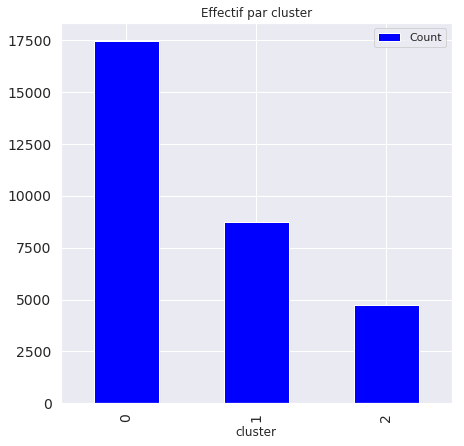

In [12]:
import p5_util
import p5_util_plot
if is_gmm_clustering is True :

    #-----------------------------------------------------------------------------------
    # Best GMM model is updated
    #-----------------------------------------------------------------------------------
    
    try :
        list_gmm_model = dict_list_gmm_model[p_covariance_type]
    except KeyError:
        p_covariance_type = dict_hyper_parameter['covariance_type'][0]
        list_gmm_model = dict_list_gmm_model[p_covariance_type]

    for gmm_model in list_gmm_model:
        if n_cluster == gmm_model.n_components:
            break
    gmm_model

    #-----------------------------------------------------------------------------------
    # Dictionary of clusters model is updated
    #-----------------------------------------------------------------------------------
    oP7_DataBreed.dict_cluster_model = {'GMM':gmm_model}

    if 'cluster' in df_desc.columns:
        del(df_desc['cluster'])

    #-----------------------------------------------------------------------------------
    # Data values (descriptors) are assigned to clusters
    #-----------------------------------------------------------------------------------
    pred_gmm = gmm_model.predict(df_desc.values)
    print(df_desc.shape)

    df_desc = p5_util.df_add_cluster(df_desc, pred_gmm)
    print(df_desc.shape)

    #-----------------------------------------------------------------------------------
    # Histogram for assignement is displayed
    #-----------------------------------------------------------------------------------
    p5_util_plot.plot_cluster_frequency(df_desc)

In [13]:
#oP7_DataBreed.list_selected_cluster = [cluster for cluster in range(0,15)]
oP7_DataBreed.cluster_model_name='GMM'
oP7_DataBreed.show()


 
Path to data directory ........ : ./data/Images
Number of original breeds ..... : 3
Total number of images ........ : 461
Standard images size .......... : (224, 224)
SIFT Image descriptors count .. : 461
Number of images in sample .... : 0
Sampling : breeds count ....... : 3
Sampling : images per breed ... : 0
X train size .................. : 0
y train size .................. : 0
X test size ................... : 0
y test size ................... : 0
Clusters models  .............. : dict_keys(['GMM'])
Current cluster model  ........ : GMM
Bag of features dataframe ..... : (0, 0)
Encoded labels from dataset ... : ()
Number of breeds in sample .... : 3
Image splitted ................ : False
Key point descriptors ......... : (30949, 128)
Classifier name ............... : 
Supported classifiers ......... : []
Number of restricted images ... : 0
Splitted parts ................ : (3, 3)
Dataframe images descriptors .. : 461 / Index(['desc', 'breed', 'kp', 'size', 'split_image', 'image

## <font color='blus'>2.b Kmeans clustering</font>

The number of clusters is fixed with the number of breeds into sample.

In [14]:
is_kmeans_clustering = False

In [15]:
import p5_util
import P7_DataBreed
#oP7_DataBreed.cluster_model_name = 
if is_kmeans_clustering is True :
    clustering='Kmeans'

    df_desc = oP7_DataBreed.df_desc

    cluster_start = 1
    cluster_end = oP7_DataBreed.sampling_breed_count+1
    cluster_start = cluster_end-1

    #clustering=oP7_DataBreed.cluster_model_name
    str_is_splitted = str(oP7_DataBreed.is_splitted)
    filename='./data/dict_list_'+clustering+'_'+str(cluster_end)+'_splitted_'+str_is_splitted+'_clusters.dump'

    dict_kmeans = p5_util.kmeans_scan_inter_inertia(df_desc, cluster_start, cluster_end)

    oP7_DataBreed.dict_cluster_model = {clustering:dict_kmeans[oP7_DataBreed.sampling_breed_count]}
    oP7_DataBreed.show()

In [16]:
if is_kmeans_clustering is True :

    oP7_DataBreed.cluster_model_name='Kmeans'
    oP7_DataBreed.show()

    cluster_model = oP7_DataBreed.cluster_model
    n_cluster == cluster_model.n_clusters
    n_cluster


    if 'cluster' in df_desc.columns:
        del(df_desc['cluster'])

    #-----------------------------------------------------------------------------------
    # Data values (descriptors) are assigned to clusters
    #-----------------------------------------------------------------------------------
    pred_cluster = cluster_model.predict(df_desc.values)
    print(df_desc.shape)

    df_desc = p5_util.df_add_cluster(df_desc, pred_cluster)
    print(df_desc.shape)

    #-----------------------------------------------------------------------------------
    # Histogram for assignement is displayed
    #-----------------------------------------------------------------------------------
    p5_util_plot.plot_cluster_frequency(df_desc)

# <font color='blus'>3. Supervized model </font>

## <font color='blus'>3.1. Building model </font>

In [17]:
if is_gmm_clustering is True :
    oP7_DataBreed.cluster_model_name='GMM'
if is_kmeans_clustering is True :
    oP7_DataBreed.cluster_model_name='Kmeans'
oP7_DataBreed.show()


 
Path to data directory ........ : ./data/Images
Number of original breeds ..... : 3
Total number of images ........ : 461
Standard images size .......... : (224, 224)
SIFT Image descriptors count .. : 461
Number of images in sample .... : 0
Sampling : breeds count ....... : 3
Sampling : images per breed ... : 0
X train size .................. : 0
y train size .................. : 0
X test size ................... : 0
y test size ................... : 0
Clusters models  .............. : dict_keys(['GMM'])
Current cluster model  ........ : GMM
Bag of features dataframe ..... : (0, 0)
Encoded labels from dataset ... : ()
Number of breeds in sample .... : 3
Image splitted ................ : False
Key point descriptors ......... : (30949, 128)
Classifier name ............... : 
Supported classifiers ......... : []
Number of restricted images ... : 0
Splitted parts ................ : (3, 3)
Dataframe images descriptors .. : 461 / Index(['desc', 'breed', 'kp', 'size', 'split_image', 'image

In [18]:
oP7_DataBreed.show_breed_name()

Doberman   ..... : n02107142-Doberman            
dingo      ..... : n02115641-dingo               
Mexican_hairless ..... : n02113978-Mexican_hairless    


### <font color='blus'>3.1.1. Building B.O.F. </font>

In [19]:
oP7_DataBreed._df_pil_image_kpdesc.columns

Index(['desc', 'breed', 'kp', 'size', 'split_image', 'image_id'], dtype='object')

In [20]:
import p5_util
import P7_DataBreed

oP7_DataBreed.build_datakp_bof()
oP7_DataBreed.show()


***Nb of errors..............= 0

***Nb of labelized images ...= 461

 
Path to data directory ........ : ./data/Images
Number of original breeds ..... : 3
Total number of images ........ : 461
Standard images size .......... : (224, 224)
SIFT Image descriptors count .. : 461
Number of images in sample .... : 0
Sampling : breeds count ....... : 3
Sampling : images per breed ... : 0
X train size .................. : 0
y train size .................. : 0
X test size ................... : 0
y test size ................... : 0
Clusters models  .............. : dict_keys(['GMM'])
Current cluster model  ........ : GMM
Bag of features dataframe ..... : (461, 3)
Encoded labels from dataset ... : (461, 3)
Number of breeds in sample .... : 3
Image splitted ................ : False
Key point descriptors ......... : (30949, 128)
Classifier name ............... : 
Supported classifiers ......... : []
Number of restricted images ... : 0
Splitted parts ................ : (3, 3)
Dataframe images desc

In [21]:
import P7_DataBreed

oP7_DataBreed.is_kp_filtered
oP7_DataBreed.is_splitted
breed_count = len(oP7_DataBreed._ser_breed_number)
filename='./data/oP7_DataBreed_'+str(breed_count)+'_breeds_splitted'
filename +='_'+str(oP7_DataBreed.is_splitted)
filename +='_KpFiltered_'+str(oP7_DataBreed.is_kp_filtered)+'.dump'

oP7_DataBreed = P7_DataBreed.update_object_save(oP7_DataBreed,filename=filename\
                                                ,is_saved=True,is_new_attribute=True)
oP7_DataBreed.show()

*** INFO : object is saved removing cv2.KeyPoint objects!

 
Path to data directory ........ : ./data/Images
Number of original breeds ..... : 3
Total number of images ........ : 461
Standard images size .......... : (224, 224)
SIFT Image descriptors count .. : 0
Number of images in sample .... : 0
Sampling : breeds count ....... : 3
Sampling : images per breed ... : 0
X train size .................. : 0
y train size .................. : 0
X test size ................... : 0
y test size ................... : 0
Clusters models  .............. : dict_keys(['GMM'])
Current cluster model  ........ : GMM
Bag of features dataframe ..... : (461, 3)
Encoded labels from dataset ... : (461, 3)
Number of breeds in sample .... : 3
Image splitted ................ : False
Key point descriptors ......... : (30949, 128)
Classifier name ............... : 
Supported classifiers ......... : []
Number of restricted images ... : 0
Splitted parts ................ : (3, 3)
Dataframe images descriptors .. : 4

## <font color='blus'>3.2. Model evaluation </font>

In [22]:

def dict_cls_score_update(self, is_score_dumped, dict_cls_score , cls_name, score):
    cluster_name = self.cluster_model_name
    filename_score = './data/dict_cls_score_'+cluster_name+'.dump'

    dict_cls_score[cls_name] = score
    if is_score_dumped is True:
        p5_util.object_dump(dict_cls_score,filename_score)
    else :
        pass
    return dict_cls_score



##### Dataset is splitted into Train and test dataset 

In [23]:
import P7_DataBreed

oP7_DataBreed.train_test_build(size_test=0.2)
oP7_DataBreed.show()


 
Path to data directory ........ : ./data/Images
Number of original breeds ..... : 3
Total number of images ........ : 461
Standard images size .......... : (224, 224)
SIFT Image descriptors count .. : 0
Number of images in sample .... : 0
Sampling : breeds count ....... : 3
Sampling : images per breed ... : 0
X train size .................. : (368, 3)
y train size .................. : (368, 3)
X test size ................... : (93, 3)
y test size ................... : (93, 3)
Clusters models  .............. : dict_keys(['GMM'])
Current cluster model  ........ : GMM
Bag of features dataframe ..... : (461, 3)
Encoded labels from dataset ... : (461, 3)
Number of breeds in sample .... : 3
Image splitted ................ : False
Key point descriptors ......... : (30949, 128)
Classifier name ............... : 
Supported classifiers ......... : []
Number of restricted images ... : 0
Splitted parts ................ : (3, 3)
Dataframe images descriptors .. : 461 / Index(['desc', 'breed', 'kp

#### Dictionary result initialization

When dicitonary does not still exists for a given cluster model, then it is initialized while fixing `is_score_dumped` value to `False`.
<br>
Otherwise, it is read from dumped file and scores are updated.
<br>
Once dumped, thenflag `is_score_dumped` has to be fixe to `True`.

In [24]:
cluster_name = oP7_DataBreed.cluster_model_name
filename_score = './data/dict_cls_score_'+cluster_name+'.dump'


import p5_util
is_score_dumped=False
if is_score_dumped is True :
    dict_cls_score = p5_util.object_load(filename_score)
else:
    dict_cls_score = dict()
    is_score_dumped = True
dict_classifier = dict()
dict_cls_score,is_score_dumped

({}, True)

### <font color='blus'>3.2.1. Evaluation of Bernoulli NB </font>

In [25]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import StandardScaler
import p6_util

X_train = oP7_DataBreed.X_train
X_test  = oP7_DataBreed.X_test
y_train = oP7_DataBreed.y_train
y_test  = oP7_DataBreed.y_test

if False :
    scaler = StandardScaler()
    scaler.fit(X_train)  
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test) 

classifier = BernoulliNB()
cls_name = 'Bernoulli NB'

dict_param_grid = {
    'estimator__alpha': [  5.e-4,1.e-4, 5.e-4, 1.e-3, 5.e-3, 1.e-2, 5.e-2, 1.e-1], # Best result : alfa=1E-4
    #'estimator__alpha': [ 1.e-4, ], #
    'n_jobs': [-1]
}
y_pred, gscv_classifier = p6_util.p6_gscv_best_classifier(dict_param_grid, classifier, X_train, y_train\
                              , X_test,y_test,cv=3, iid=True)

score = gscv_classifier.best_score_
dict_classifier[cls_name]=gscv_classifier.best_estimator_


filename = './data/best_dict_classifier.dump'
p5_util.object_dump(dict_classifier,filename)

dict_cls_score = dict_cls_score_update(oP7_DataBreed, is_score_dumped, dict_cls_score , cls_name, score)

dict_cls_score


0.0
{'estimator__alpha': 0.0005, 'n_jobs': -1}


{'Bernoulli NB': 0.0}

### <font color='blus'>3.2.2. Random Forest</font>

R.F. applies well when there is no linear relation between features and classes.

In [26]:
from sklearn.ensemble import RandomForestClassifier
cls_name = 'Random Forest'

X_train = oP7_DataBreed.X_train
X_test  = oP7_DataBreed.X_test
y_train = oP7_DataBreed.y_train
y_test  = oP7_DataBreed.y_test
dict_param_grid = {
    #'estimator__n_estimators': [ 100, 200, 300,], # 100, accuracy=0.295
    #'estimator__n_estimators': [ 10,50,90,100,110], # 10, accuracy=0.297
    #'estimator__n_estimators': [ 5,9,10,11,15], # 10, accuracy=0.55
    'estimator__n_estimators': [ 11,13,15,17,19,21,23,25,27], # 10, accuracy=0
}
classifier = RandomForestClassifier()

y_pred, gscv_classifier = p6_util.p6_gscv_best_classifier(dict_param_grid, classifier, X_train, y_train\
                              , X_test,y_test,cv=3, iid=True)

score = gscv_classifier.best_score_
dict_classifier[cls_name]=gscv_classifier.best_estimator_
filename = './data/best_dict_classifier.dump'
p5_util.object_dump(dict_classifier,filename)

dict_cls_score = dict_cls_score_update(oP7_DataBreed, is_score_dumped, dict_cls_score , cls_name, score)

dict_cls_score


0.296195652173913
{'estimator__n_estimators': 23}


{'Bernoulli NB': 0.0, 'Random Forest': 0.296195652173913}

### <font color='blus'>3.2.3. Logistic Regression classification</font>

L.R. works well if no correlation exists in between images.<br>
This is not the case for dogs belonging the same breed.<br>

In [27]:
from sklearn.linear_model import LogisticRegression
import p5_util
import p6_util
import P7_DataBreed
if True :
    dict_param_grid = {
        'estimator__C': [ 1.e-1, 0.5, 1., 1.5], # Best classifier: 1.e-1, accuracy=0.41
        #'estimator__C': [ 1.e-1, 0.5, 1., 1.5], # Best classifier: 0.1, accuracy=0.41
        #'estimator__C': [1.e-4, 1.e-3, 1.e-2, ], # Best classifier: 0.1, accuracy=0.41
        'estimator__solver':['newton-cg', 'lbfgs' ,'sag'],
        'estimator__penalty': ['l2'],
        'n_jobs': [-1]
    }
    cls_name = 'L.R. + multinomial'

    X_train = oP7_DataBreed.X_train
    X_test  = oP7_DataBreed.X_test
    y_train = oP7_DataBreed.y_train
    y_test  = oP7_DataBreed.y_test
    classifier = LogisticRegression(multi_class='multinomial',solver='newton-cg')

    print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
    y_pred, gscv_classifier = p6_util.p6_gscv_best_classifier(dict_param_grid, classifier, X_train, y_train\
                                  , X_test,y_test,cv=3, iid=True)

    classifier  = gscv_classifier.best_estimator_

    score = gscv_classifier.best_score_
    dict_classifier[cls_name]=gscv_classifier.best_estimator_
    filename = './data/best_dict_classifier.dump'
    p5_util.object_dump(dict_classifier,filename)

    dict_cls_score = dict_cls_score_update(oP7_DataBreed, is_score_dumped, dict_cls_score , cls_name, score)

    dict_cls_score


(368, 3) (368, 3) (93, 3) (93, 3)
0.0
{'estimator__C': 0.1, 'estimator__penalty': 'l2', 'estimator__solver': 'newton-cg', 'n_jobs': -1}


### <font color='blus'>3.2.4. Evaluation of Logictic regression with hyper-parameter `multi_class='ovr'`</font>

In [28]:
from sklearn.linear_model import LogisticRegression
import p5_util
import p6_util
import P7_DataBreed
if False :
    dict_param_grid = {
        #'estimator__C': [ 1.e-1, 0.5, 1., 1.5], # Best classifier: 1.5, accuracy=0.27
        #'estimator__C': [ 1.5, 2.0, 2.5], # Best classifier: 2.5, accuracy>0.27
        #'estimator__C': [2.5, 5.0, 10., ], # Best classifier: 10.0 , accuracy=0.28
        #'estimator__C': [10., 50., 100., ], # Best classifier: 100.0 , accuracy=0.29
        'estimator__C': [90.,100., 110.,], # Best classifier: 90.0 , accuracy=0.287
        'estimator__solver':['newton-cg', 'lbfgs' ,'sag','liblinear'],
        #'estimator__solver':[ 'saga','liblinear'],
        'estimator__penalty': ['l2'],
        'n_jobs': [-1]
    }
    cls_name = 'L.R. + ovr'

    X_train = oP7_DataBreed.X_train
    X_test  = oP7_DataBreed.X_test
    y_train = oP7_DataBreed.y_train
    y_test  = oP7_DataBreed.y_test
    classifier = LogisticRegression(multi_class='ovr')

    print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
    y_pred, gscv_classifier = p6_util.p6_gscv_best_classifier(dict_param_grid, classifier, X_train, y_train\
                                  , X_test,y_test,cv=3, iid=False)

    classifier  = gscv_classifier.best_estimator_

    score = gscv_classifier.best_score_
    dict_classifier[cls_name]=gscv_classifier.best_estimator_
    filename = './data/best_dict_classifier.dump'
    p5_util.object_dump(dict_classifier,filename)

    dict_cls_score = dict_cls_score_update(oP7_DataBreed, is_score_dumped, dict_cls_score , cls_name, score)

    dict_cls_score


### <font color='blus'>3.2.5. Evaluation of Multinomial NB</font>

In [29]:
from sklearn.naive_bayes import MultinomialNB
if False :

    X_train = oP7_DataBreed.X_train
    X_test  = oP7_DataBreed.X_test
    y_train = oP7_DataBreed.y_train
    y_test  = oP7_DataBreed.y_test

    cls_name = 'Multinomial NB'
    classifier = MultinomialNB()
    dict_param_grid = {
        #'estimator__alpha': [ 1.e-3, 5.e-2, 1.e-1, 5.e-1, 1.], #1.e-3 : Accuracy 0.0
        'estimator__alpha': [ 1.e-5, 1.e-4, 1.e-3,], #1.e-3 : Accuracy 0.0
        'n_jobs': [-1]
    }

    y_pred, gscv_classifier = p6_util.p6_gscv_best_classifier(dict_param_grid, classifier, X_train, y_train\
                                  , X_test,y_test,cv=3, iid=True)

    classifier  = gscv_classifier.best_estimator_

    score = gscv_classifier.best_score_
    dict_classifier[cls_name]=gscv_classifier.best_estimator_
    filename = './data/best_dict_classifier.dump'
    p5_util.object_dump(dict_classifier,filename)

    dict_cls_score = dict_cls_score_update(oP7_DataBreed, is_score_dumped, dict_cls_score , cls_name, score)

    dict_cls_score


### <font color='blus'>3.2.6. Evaluation of Gaussian NB</font>

In [30]:
from sklearn.naive_bayes import GaussianNB
from scipy import sparse


X_train = oP7_DataBreed.X_train
X_test  = oP7_DataBreed.X_test
y_train = oP7_DataBreed.y_train
y_test  = oP7_DataBreed.y_test

cls_name = 'Gaussian NB'
classifier = GaussianNB()

dict_param_grid = dict()
y_pred, gscv_classifier = p6_util.p6_gscv_best_classifier(dict_param_grid, classifier, X_train, y_train\
                              , X_test,y_test,cv=3, iid=True)

dict_classifier[cls_name]=gscv_classifier.best_estimator_
filename = './data/best_dict_classifier.dump'
p5_util.object_dump(dict_classifier,filename)

score = gscv_classifier.best_score_
dict_cls_score = dict_cls_score_update(oP7_DataBreed, is_score_dumped, dict_cls_score , cls_name, score)
dict_cls_score


0.18478260869565216
{}


{'Bernoulli NB': 0.0,
 'Random Forest': 0.296195652173913,
 'L.R. + multinomial': 0.0,
 'Gaussian NB': 0.18478260869565216}

### <font color='blus'>3.2.7. Linear SVC</font>

In [31]:
from sklearn.svm import LinearSVC

nb_estimators=100
cls_name = 'Linear SVC'

X_train = oP7_DataBreed.X_train
X_test  = oP7_DataBreed.X_test
y_train = oP7_DataBreed.y_train
y_test  = oP7_DataBreed.y_test

dict_param_grid = {
        #'estimator__C': [ 1e-1,5e-1,1.,0.5,10], # 10 / 0.282%
        #'estimator__C': [ 10,20,30], # 30 / 0.283%
        'estimator__C': [ 30, 50,100,200], # 100 / 0.283%
        'n_jobs': [-1]
}
classifier = LinearSVC(multi_class='ovr')

y_pred, gscv_classifier = p6_util.p6_gscv_best_classifier(dict_param_grid, classifier, X_train, y_train\
                              , X_test,y_test,cv=3, iid=True)

dict_classifier[cls_name]=gscv_classifier.best_estimator_
filename = './data/best_dict_classifier.dump'
p5_util.object_dump(dict_classifier,filename)

score = gscv_classifier.best_score_
dict_cls_score = dict_cls_score_update(oP7_DataBreed, is_score_dumped, dict_cls_score , cls_name, score)
dict_cls_score


0.08967391304347826
{'estimator__C': 200, 'n_jobs': -1}


{'Bernoulli NB': 0.0,
 'Random Forest': 0.296195652173913,
 'L.R. + multinomial': 0.0,
 'Gaussian NB': 0.18478260869565216,
 'Linear SVC': 0.08967391304347826}

### <font color='blus'>3.2.8. Kernel Ridge</font>

In [32]:
from sklearn.linear_model import RidgeClassifier
if True :
    cls_name = 'Kernel Ridge'

    X_train = oP7_DataBreed.X_train
    X_test  = oP7_DataBreed.X_test
    y_train = oP7_DataBreed.y_train
    y_test  = oP7_DataBreed.y_test
    dict_param_grid = {
        'estimator__alpha': [ 0.05,0.1,0.15],# 0.1 / 0.32%
        'n_jobs': [-1]
    }
    cls_name='KR Classifier'
    classifier = RidgeClassifier()

    y_pred, gscv_classifier = p6_util.p6_gscv_best_classifier(dict_param_grid, classifier, X_train, y_train\
                                  , X_test,y_test,cv=3, iid=True)

    dict_classifier[cls_name]=gscv_classifier.best_estimator_
    filename = './data/best_dict_classifier.dump'
    p5_util.object_dump(dict_classifier,filename)

    score = gscv_classifier.best_score_
    dict_cls_score = dict_cls_score_update(oP7_DataBreed, is_score_dumped, dict_cls_score , cls_name, score)
    dict_cls_score


0.029891304347826088
{'estimator__alpha': 0.05, 'n_jobs': -1}


### <font color='blus'>3.2.9. Benchmark results</font>

In [33]:
oP7_DataBreed.show()


 
Path to data directory ........ : ./data/Images
Number of original breeds ..... : 3
Total number of images ........ : 461
Standard images size .......... : (224, 224)
SIFT Image descriptors count .. : 0
Number of images in sample .... : 0
Sampling : breeds count ....... : 3
Sampling : images per breed ... : 0
X train size .................. : (368, 3)
y train size .................. : (368, 3)
X test size ................... : (93, 3)
y test size ................... : (93, 3)
Clusters models  .............. : dict_keys(['GMM'])
Current cluster model  ........ : GMM
Bag of features dataframe ..... : (461, 3)
Encoded labels from dataset ... : (461, 3)
Number of breeds in sample .... : 3
Image splitted ................ : False
Key point descriptors ......... : (30949, 128)
Classifier name ............... : 
Supported classifiers ......... : []
Number of restricted images ... : 0
Splitted parts ................ : (3, 3)
Dataframe images descriptors .. : 461 / Index(['desc', 'breed', 'kp

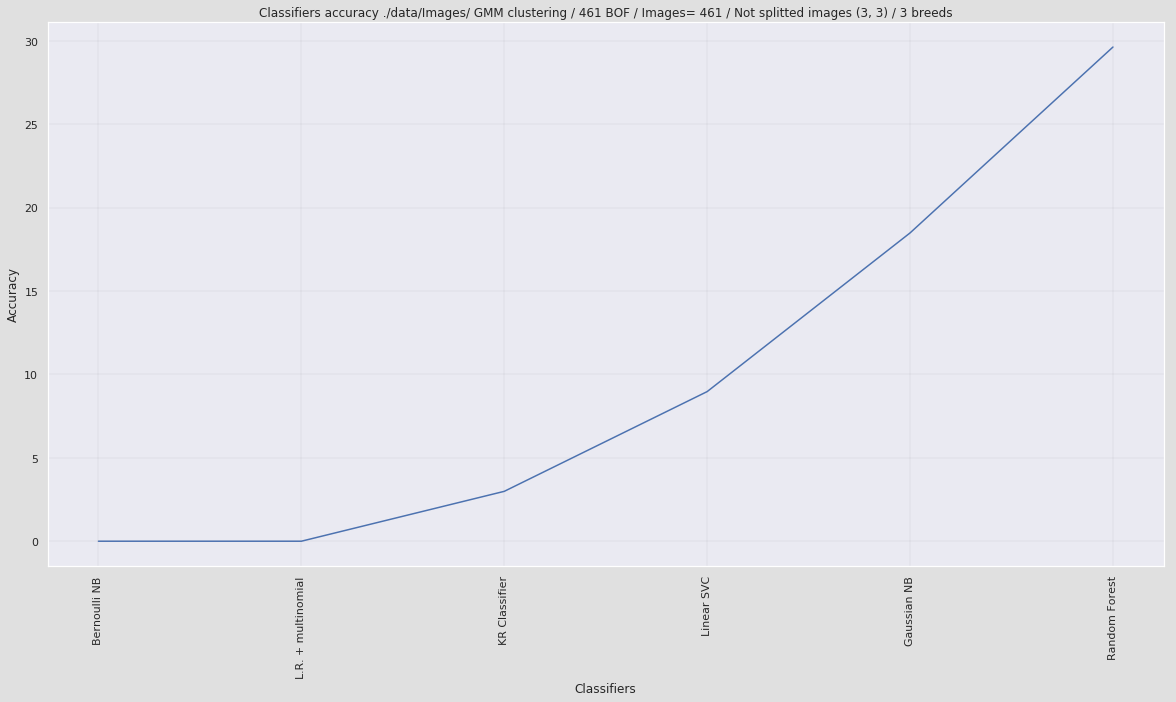

{'Bernoulli NB': 0.0,
 'Random Forest': 0.296195652173913,
 'L.R. + multinomial': 0.0,
 'Gaussian NB': 0.18478260869565216,
 'Linear SVC': 0.08967391304347826,
 'KR Classifier': 0.029891304347826088}

In [34]:
import pandas as pd
import p5_util
import p6_util_plot

dict_benchmark_result = dict_cls_score.copy()

df_result = pd.DataFrame.from_dict( dict_benchmark_result, orient='index')
df_result.reset_index(inplace=True)
df_result.rename(columns={'index':'Classifier',0:'Score'}, inplace=True)
df_result
str_nb_images = str(oP7_DataBreed.image_process_count)
nb_bof = oP7_DataBreed.df_pil_image_kpdesc.shape[0]
clustering = oP7_DataBreed.cluster_model_name
str_split_ratio = str(oP7_DataBreed.split_ratio)

str_image_bank = oP7_DataBreed.dir_path
if oP7_DataBreed.is_kp_filtered :
    title = "Classifiers accuracy "+str_image_bank+" / "+clustering+" clustering / "+str(nb_bof)+" BOF / Images= "+str_nb_images+" / Filtered / Splitted ratio "+str_split_ratio+" / "+str(oP7_DataBreed.sampling_breed_count)+" breeds"
else :
    if oP7_DataBreed.is_splitted :
        title = "Classifiers accuracy "+str_image_bank+" / "+clustering+" clustering / "+str(nb_bof)+" BOF / Images="+str_nb_images+" / Splitted ratio "+str_split_ratio+" / "+str(oP7_DataBreed.sampling_breed_count)+" breeds"
    else : 
        title = "Classifiers accuracy "+str_image_bank+"/ "+clustering+" clustering / "+str(nb_bof)+" BOF / Images= "+str_nb_images+" / Not splitted images "+str_split_ratio+" / "+str(oP7_DataBreed.sampling_breed_count)+" breeds"
p6_util_plot.ser_item_occurency_plot(df_result.Classifier, df_result.Score*100, item_count=None, title=title,\
                                    p_reverse=False,p_x_title='Classifiers', p_y_title='Accuracy')

#### Classifier API

dict_cls_score

In [35]:
#### Benchmark result is dumped.

In [36]:
import p5_util
list_ = oP7_DataBreed.dir_path.split('/')
print(list_[2])
if True :
    filename = './data/dict_cls_score_'+str(list_[2])\
    +'_'+str(len(oP7_DataBreed._dict_data))+'breeds_splitted_'+str(oP7_DataBreed.is_splitted)+'.dump'
    p5_util.object_dump(dict_cls_score,filename)

Images


In [37]:
oP7_DataBreed.dict_classifier = dict_classifier
oP7_DataBreed.classifier_name = 'Linear SVC'
oP7_DataBreed.show()
oP7_DataBreed.show_breed_name()


 
Path to data directory ........ : ./data/Images
Number of original breeds ..... : 3
Total number of images ........ : 461
Standard images size .......... : (224, 224)
SIFT Image descriptors count .. : 0
Number of images in sample .... : 0
Sampling : breeds count ....... : 3
Sampling : images per breed ... : 0
X train size .................. : (368, 3)
y train size .................. : (368, 3)
X test size ................... : (93, 3)
y test size ................... : (93, 3)
Clusters models  .............. : dict_keys(['GMM'])
Current cluster model  ........ : GMM
Bag of features dataframe ..... : (461, 3)
Encoded labels from dataset ... : (461, 3)
Number of breeds in sample .... : 3
Image splitted ................ : False
Key point descriptors ......... : (30949, 128)
Classifier name ............... : Linear SVC
Supported classifiers ......... : ['Bernoulli NB', 'Random Forest', 'L.R. + multinomial', 'Gaussian NB', 'Linear SVC', 'KR Classifier']
Number of restricted images ... : 0

In [38]:
import os
breedname = 'n02107142-Doberman'
oP7_DataBreed.show_image_name(breedname,is_sample_show=True)

Directory breed name = ./data/Images/n02107142-Doberman Nb of images = 150

Number of images =150
Image name= n02107142_5395.jpg
Image name= n02107142_2553.jpg
Image name= n02107142_5766.jpg
Image name= n02107142_4725.jpg
Image name= n02107142_11042.jpg
Image name= n02107142_7311.jpg
Image name= n02107142_1901.jpg
Image name= n02107142_5284.jpg
Image name= n02107142_15003.jpg
Image name= n02107142_15334.jpg
Image name= n02107142_7841.jpg
Image name= n02107142_13356.jpg
Image name= n02107142_11493.jpg
Image name= n02107142_1193.jpg
Image name= n02107142_12076.jpg
Image name= n02107142_17899.jpg
Image name= n02107142_4255.jpg
Image name= n02107142_8437.jpg
Image name= n02107142_208.jpg
Image name= n02107142_18020.jpg
Image name= n02107142_9621.jpg
Image name= n02107142_3227.jpg
Image name= n02107142_18582.jpg
Image name= n02107142_6859.jpg
Image name= n02107142_16917.jpg
Image name= n02107142_4632.jpg
Image name= n02107142_1306.jpg
Image name= n02107142_3488.jpg
Image name= n02107142_446

*** build_sift_desc() ...

INFO : Error = 0 Total images processed= 9

*** WARN : Nb of exceptions during process ... : 1

***Nb of errors..............= 1

***Nb of labelized images ...= 8

***WARN : build_datakp_bof() : errors= 1

 Processing result after prediction ...
get_breedname_from_breedlabel() : breedlabel = 0
Doberman ['Doberman']


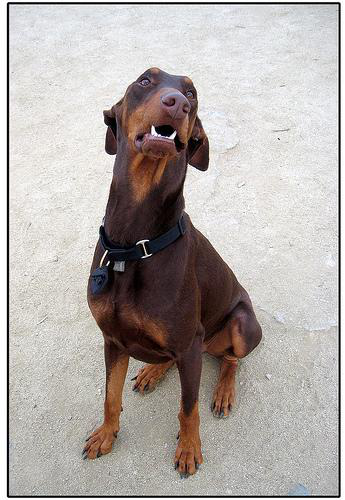

In [39]:
if True :
    r_breedname, list_predicted, pil_image = oP7_DataBreed.predict(breedname,'n02107142_7205.jpg', top=1)

print(r_breedname, list_predicted)
pil_image

In [40]:
oP7_DataBreed._ser_breed_number

0            Doberman
1               dingo
2    Mexican_hairless
dtype: object

In [41]:
oP7_DataBreed.load(list_dirbreed=list_dirbreed_2_breeds)
oP7_DataBreed.build_ser_number_breedname()


INFO : Series already built!
Building...


In [42]:
oP7_DataBreed.show()


 
Path to data directory ........ : ./data/Images
Number of original breeds ..... : 2
Total number of images ........ : 306
Standard images size .......... : (224, 224)
SIFT Image descriptors count .. : 0
Number of images in sample .... : 0
Sampling : breeds count ....... : 2
Sampling : images per breed ... : 0
X train size .................. : (368, 3)
y train size .................. : (368, 3)
X test size ................... : (93, 3)
y test size ................... : (93, 3)
Clusters models  .............. : dict_keys(['GMM'])
Current cluster model  ........ : GMM
Bag of features dataframe ..... : (461, 3)
Encoded labels from dataset ... : (461, 3)
Number of breeds in sample .... : 2
Image splitted ................ : False
Key point descriptors ......... : (30949, 128)
Classifier name ............... : Linear SVC
Supported classifiers ......... : ['Bernoulli NB', 'Random Forest', 'L.R. + multinomial', 'Gaussian NB', 'Linear SVC', 'KR Classifier']
Number of restricted images ... : 0

p5_util.object_load : fileName= ./data/dict_cls_score_Images_3breeds_splitted_False.dump
p5_util.object_load : fileName= ./data/dict_cls_score_Images_3breeds_splitted_True.dump
No KP filter
KP filters


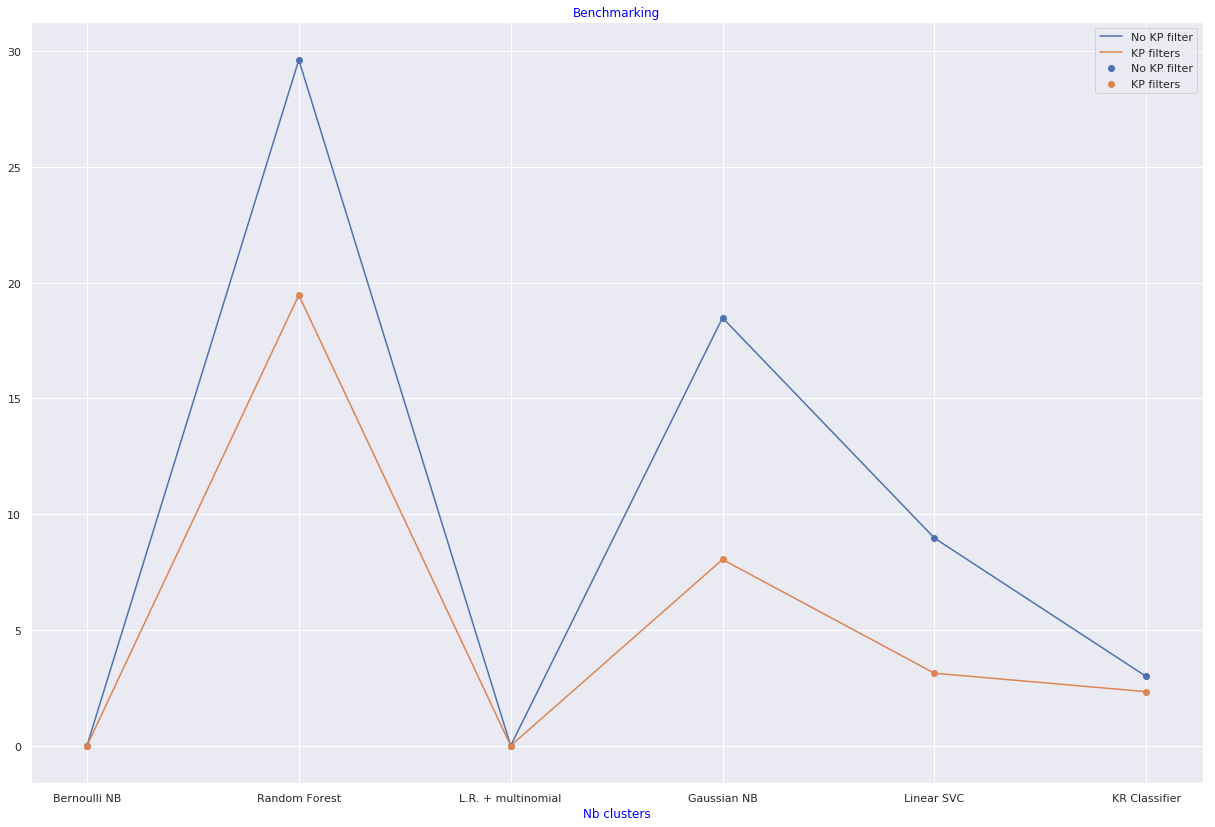

In [45]:
import p7_util

filename1 = './data/dict_cls_score_Images_3breeds_splitted_False.dump'
dict_cls_score_1 = p5_util.object_load(filename1)
filename2 = './data/dict_cls_score_Images_3breeds_splitted_True.dump'
dict_cls_score_2 = p5_util.object_load(filename2)

for key, value in dict_cls_score_1.items() :
    dict_cls_score_1[key] = value*100
for key, value in dict_cls_score_2.items() :
    dict_cls_score_2[key] = value*100

dict_dict_score={'No KP filter':dict_cls_score_1,'KP filters':dict_cls_score_2}

p_figsize=(21,14)
areas_rows = 1
areas_colums =1
p_title = "Benchmarking"
p7_util.p7_plot_dict_dict_score(dict_dict_score\
, p_figsize, p_title, areas_rows, areas_colums)

In [44]:
list_row_col=[(0,0),(0,0)]
for hyper_parameter,row_col in zip(dict_dict_score,list_row_col):
    print(hyper_parameter)

No KP filter
KP filters
